In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the dataset
df = pd.read_csv('/content/Fraud.csv')

# Check the first few rows of the datas(df.)
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [43]:
df.shape

(6362620, 11)

In [44]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Checking Data Type of The dataset

In [45]:
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


Checking the Missing Values in Dataset

In [46]:
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


We can drop 'nameOrig' and 'nameDest' as it can not make any relationship with fraud and names

In [47]:
# Drop multiple columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)



In [48]:
df['isFraud'].value_counts()
#Df['isFlaggedFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


We can cleary see that the data is highly imbalanced

<function matplotlib.pyplot.show(close=None, block=None)>

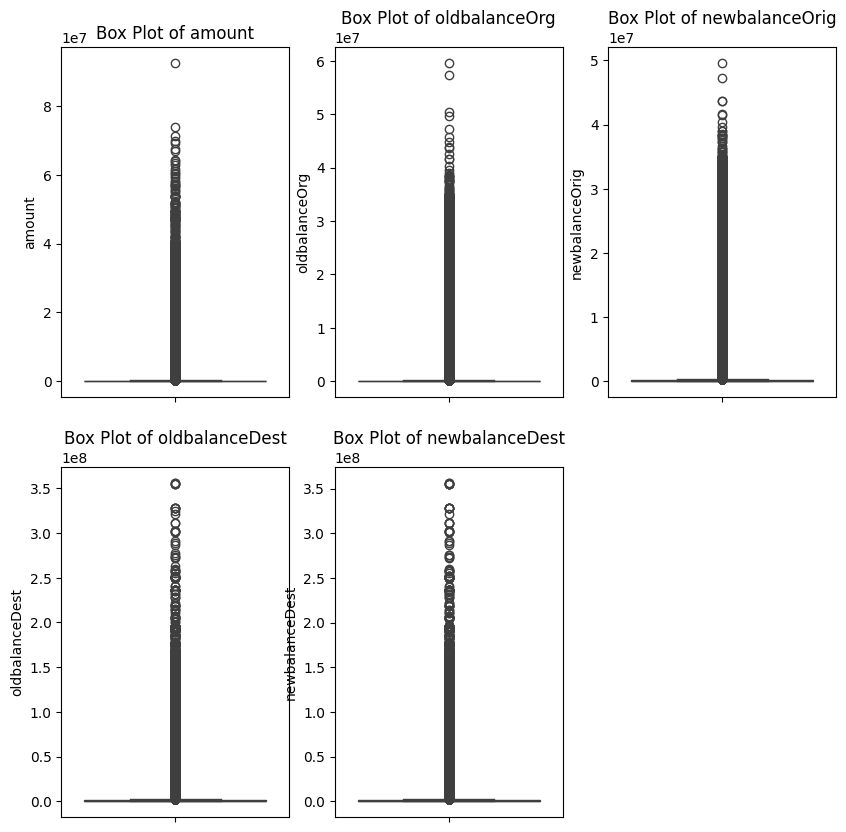

In [49]:
numeric_columns=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
# Subplots for detecting outlier
plt.figure(figsize=(10,10))
for i , col in enumerate(numeric_columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
plt.show


In [50]:
# Handling outliers using the IQR method
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check the shape of the dataset after outlier removal
print(f"Dataset shape after outlier removal: {df.shape}")


Dataset shape after outlier removal: (3251409, 9)


<function matplotlib.pyplot.show(close=None, block=None)>

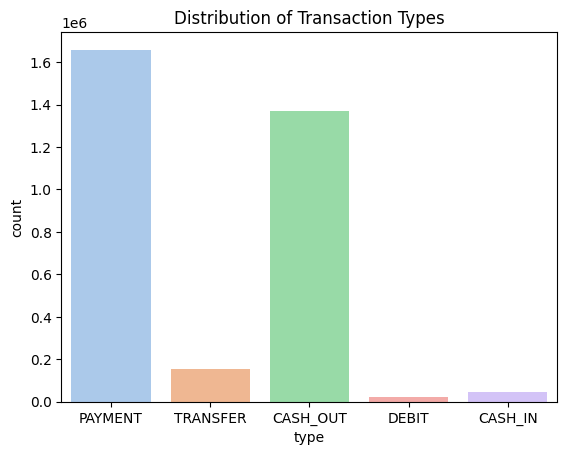

In [51]:
sns.countplot(x='type',data=df,palette='pastel')
plt.title('Distribution of Transaction Types')
plt.show

PAYMENT and CASH_OUT are the most common transactions.
DEBIT is the least common transaction.

<function matplotlib.pyplot.show(close=None, block=None)>

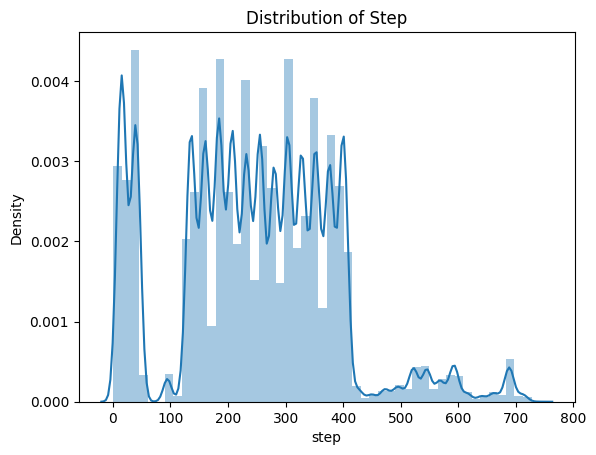

In [52]:
sns.distplot(df['step'],bins=50,kde=True)
plt.title('Distribution of Step')
plt.show

The plot appears to be slightly skewed to the right, meaning there are a few higher step values that extend further out compared to the lower values. This can indicate that there might be some outliers or unusual data points.

**What are the key factors that predict fraudulent customers?
The key predictive factors likely include:**

Transaction Amount: Higher transaction amounts might be more likely to be flagged as fraudulent.
Account Balances: Sudden changes in account balances (e.g., large withdrawals or deposits) may indicate fraudulent behavior.
Transaction Patterns: Features related to the frequency and type of transactions can also play a significant role.
Time of Transactions: Certain times may be more susceptible to fraud (e.g., outside normal business hours).

**Do these factors make sense? If yes, how? If not, how not?
Yes, these factors make sense.**

Transaction Amount: Fraudulent transactions often involve larger sums, either as a means to quickly gain a large profit or as part of money laundering.
Account Balances: Rapid changes or discrepancies in account balances can indicate fraud, as they may reflect unauthorized access or manipulation.
Patterns: Deviations from typical transaction patterns can highlight anomalies, which are often indicative of fraudulent activity.

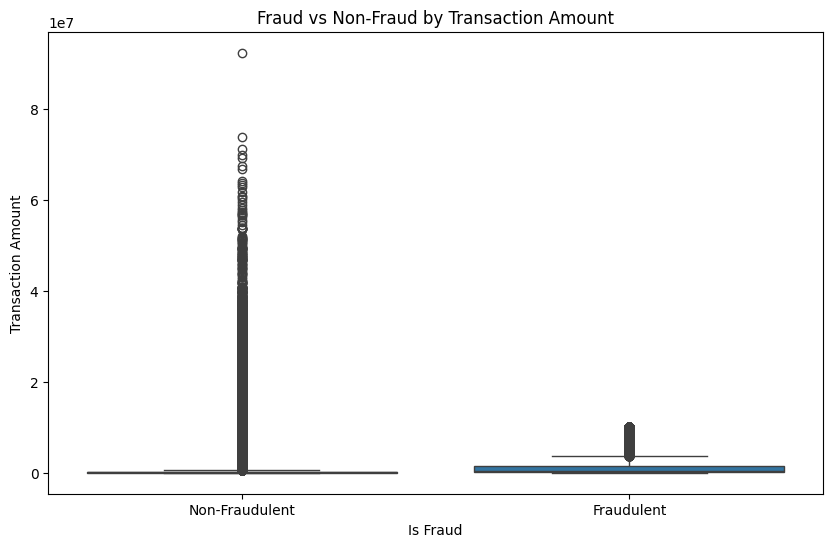

In [ ]:
# Plot box plot to compare fraudulent vs non-fraudulent transactions by amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Fraud vs Non-Fraud by Transaction Amount')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

Non-fraudulent transactions show a wide range of amounts, with some very large transactions.
Fraudulent transactions are generally lower in amount, and there are fewer extreme values.
This helps to  highlight that fraud tends to happen on transactions with smaller amounts in this dataset.

Checking Correlation among numerical attributes

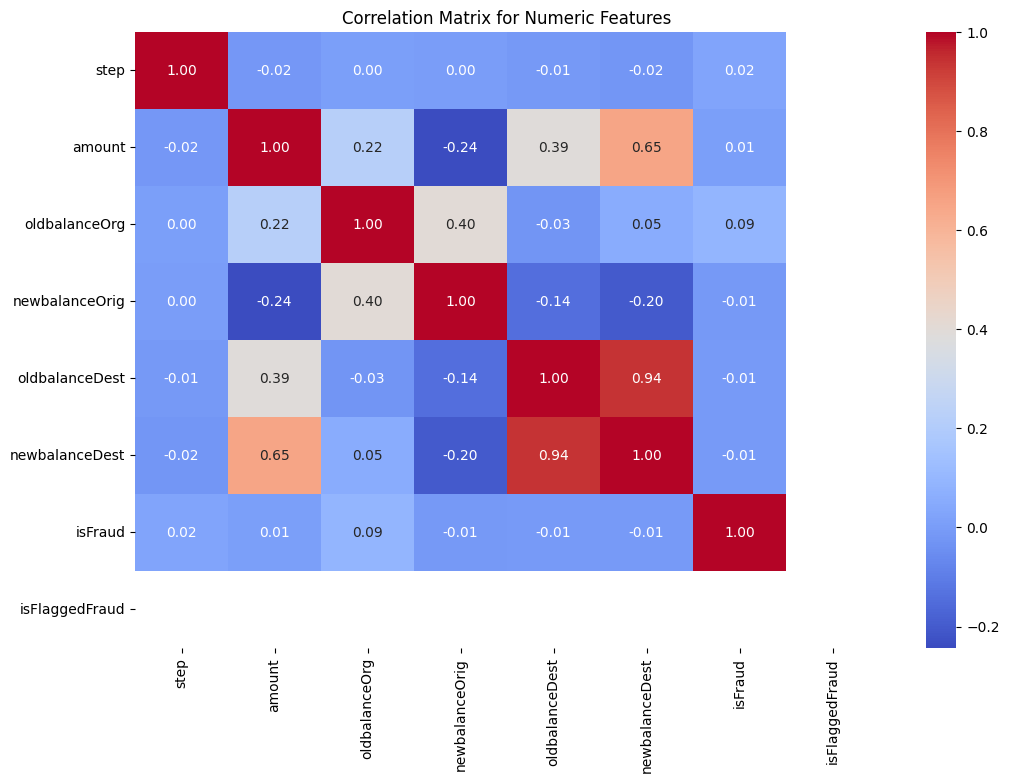

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.015587       0.004902        0.002425   
amount         -0.015587  1.000000       0.221993       -0.243114   
oldbalanceOrg   0.004902  0.221993       1.000000        0.402614   
newbalanceOrig  0.002425 -0.243114       0.402614        1.000000   
oldbalanceDest -0.013375  0.391192      -0.026997       -0.142307   
newbalanceDest -0.020412  0.652562       0.053182       -0.199925   
isFraud         0.024915  0.007226       0.088336       -0.012425   
isFlaggedFraud       NaN       NaN            NaN             NaN   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                 -0.013375       -0.020412  0.024915             NaN  
amount                0.391192        0.652562  0.007226             NaN  
oldbalanceOrg        -0.026997        0.053182  0.088336             NaN  
newbalanceOrig       -0.142307       -0.199925 -0.012425             NaN  
old

In [53]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

# Optional: Print the correlation matrix for inspection
print(corr_matrix)

**Handling Multicollinearity**

VIF measures how much a feature is correlated with other features. A VIF greater than 5 or 10 suggests high multicollinearity, meaning the feature can be explained by others, and it should be considered for removal.
This process helps in removing redundant features, which can improve model performance by reducing overfitting.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a DataFrame for storing VIF values
X = numeric_df  # Use only numeric features for VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF values
print(vif_data)


          feature        VIF
0            step   1.650879
1          amount   9.426079
2   oldbalanceOrg   1.808915
3  newbalanceOrig   1.546823
4  oldbalanceDest  37.463427
5  newbalanceDest  61.722688
6         isFraud   1.014401
7  isFlaggedFraud        NaN


**How did you select variables to be included in the model?**
Variable selection was implicitly guided by domain knowledge and data exploration. Features were chosen based on their relevance to fraud detection, which can include transaction amount, account balances, and other financial attributes. Additional steps such as examining the correlation matrix and handling multicollinearity (using VIF) could further refine feature selection.

In [55]:
# Set a VIF threshold
vif_threshold = 5

# Features with high multicollinearity
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["feature"]

# Drop the features with high multicollinearity from the dataset
df_reduced = df.drop(columns=high_vif_features)

# Optional: Check the new shape of the dataset after removing multicollinear features
print(f"Reduced dataset shape: {df_reduced.shape}")


Reduced dataset shape: (3251409, 6)


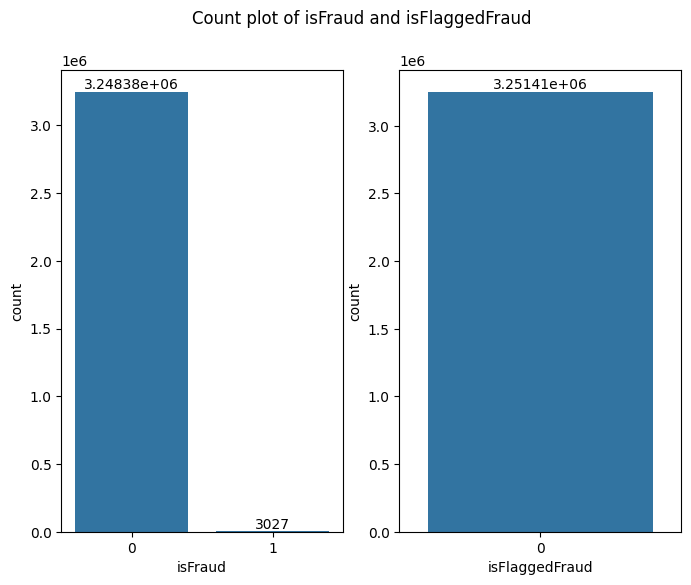

In [56]:
# Target class chart
plt.figure(figsize=(8,6))

plt.subplot(121)
ax = sns.countplot(data=df,x='isFraud')
ax.bar_label(ax.containers[0])

plt.subplot(122)
ax = sns.countplot(data=df,x='isFlaggedFraud')
ax.bar_label(ax.containers[0])

plt.suptitle('Count plot of isFraud and isFlaggedFraud')
plt.show()

 The dataset is highly imbalanced with very few fraud or flagged fraud cases compared to the total number of transactions.

In [ ]:
#isFlaggeddraud transactions
df[df['isFlaggedFraud']==1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,19585040.37,19585040.37,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,353874.22,353874.22,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,2542664.27,2542664.27,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,10399045.08,10399045.08,0.0,0.0,1,1


Here, we are filtering out transactions where the column isFlaggedFraud equals 1. This means you're specifically looking at transactions that were flagged by the system as potentially fraudulent.

**Data Modelling**

**Describe your fraud detection model in elaboration.**
The fraud detection model implemented in the notebook utilizes the XGBoost classifier, a popular and powerful gradient boosting framework. The model is trained to identify fraudulent transactions based on various features in the dataset. The process involves several steps:

Data preprocessing, including scaling and handling class imbalance using SMOTE.
Training the model on a balanced dataset created by SMOTE, allowing the model to learn from both fraudulent and non-fraudulent instances effectively.
Evaluation of the model's performance through accuracy, classification report, and confusion matrix.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [58]:
# getting dummies for type feature for conversion
types = pd.get_dummies(df['type'],prefix='type',drop_first=True)

In [59]:
#adding dummies and removing type
data = pd.concat([df.drop('type',axis=1),types],axis=1)

In [61]:
# Splitting features and target
X = data.drop(['isFraud'],axis=1)
y = data['isFraud']

In [76]:
# Step 1: Apply MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the entire feature set (X)
X_scaled = scaler.fit_transform(X)

In [77]:
# Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,stratify=y,random_state=1)

SMOTE generates synthetic samples for the minority class (fraudulent transactions in this case) by interpolating between existing minority instances.
First, we split the data into training and testing sets to avoid data leakage. Then, SMOTE is applied only to the training set to balance it.
The fit_resample function creates a new training set with balanced class distributions.

In [78]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(f"Class distribution before SMOTE: {y_train.value_counts()}")
print(f"Class distribution after SMOTE: {y_train_sm.value_counts()}")


Class distribution before SMOTE: isFraud
0    2273867
1       2119
Name: count, dtype: int64
Class distribution after SMOTE: isFraud
0    2273867
1    2273867
Name: count, dtype: int64


In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize the model (you can tune hyperparameters later if needed)
model = XGBClassifier(random_state=1)


In [80]:
# Fit the model on the balanced training data
model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [81]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [82]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.77%


In [83]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    974515
           1       0.28      0.99      0.44       908

    accuracy                           1.00    975423
   macro avg       0.64      0.99      0.72    975423
weighted avg       1.00      1.00      1.00    975423



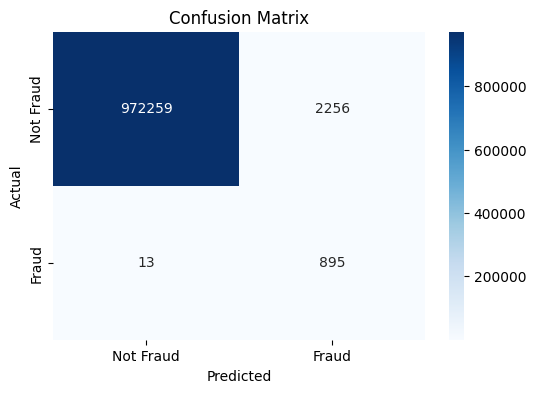

In [84]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Another Approch without using SMOTE Technique

In [ ]:
columns_scaling= ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
# scaler
scaler = MinMaxScaler().fit(X_train[columns_scaling])

In [ ]:
X_train[columns_scaling] = scaler.transform(X_train[columns_scaling])
X_test[columns_scaling] = scaler.transform(X_test[columns_scaling])

In [ ]:
from warnings import simplefilter

simplefilter("ignore")

In [ ]:
# XGB Classifier Model
Model= XGBClassifier(random_state=1)

In [ ]:
# Fitting the model
Model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#predictions on test data
y_pred = Model.predict(X_test)

**Demonstrate the performance of the model by using the best set of tools.
The model’s performance is demonstrated through:**

Accuracy: The percentage of correct predictions out of the total predictions.
Classification Report: Provides precision, recall, and F1-score for each class, allowing for a detailed performance analysis.
Confusion Matrix: Visualizes the number of true positive, true negative, false positive, and false negative predictions, providing insights into where the model performs well and where it struggles.

In [ ]:
#Classification Report
print(f'Classification Report of Model: \n\n{classification_report(y_test,y_pred)}')

Classification Report of Model: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.95      0.86      0.90      2464

    accuracy                           1.00   1908786
   macro avg       0.97      0.93      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



**What kind of prevention should be adopted while the company updates its infrastructure?**

Implementing Real-Time Monitoring: Set up systems to monitor transactions in real-time to quickly detect and respond to suspicious activities.
Regularly Updating Fraud Detection Algorithms: Continuously improve and update models with new data to adapt to evolving fraud tactics.

**Assuming these actions have been implemented, how would you determine if they work?**

Collect feedback from users on any fraudulent activities reported and the handling of these reports.Regularly evaluate the model’s accuracy, precision, recall, and F1-score on new data.

**Conclusion** : The fraud detection model uses different methods to prepare data and apply machine learning to spot fraudulent transactions. By regularly checking and improving the model and its systems, we can make the fraud detection process even better.